# 시계열 다루기

# 파이썬에서의 날짜와 시간

In [1]:
#기본 파이썬 날짜와 시간: datetime과 dateutil
#날짜를 직접 구성할 수 있다
from datetime import datetime
datetime(year=2015,month=7,day=4)

datetime.datetime(2015, 7, 4, 0, 0)

In [2]:
#다양한 문자열 형태로부터 날짜를 해석할 수 있다
from dateutil import parser
date=parser.parse("4th of July, 2015")
date

datetime.datetime(2015, 7, 4, 0, 0)

In [3]:
#datetime객체를 갖고 나면 요일을 출력하는 등의 작업 가능
date.strftime("%A")

'Saturday'

In [4]:
#타입이 지정된 시간 배열: NumPy의 datetime64
#datetime64는 매우 구체적인 입력 형식이 필요
import numpy as np
date=np.array('2015-07-04',dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [5]:
#날짜 포맷이 정해지고 나면 거기에 벡터화된 연산을 빠르게 수행 가능
date+np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [6]:
#하루 단위의 datetime
np.datetime64('2015-07-04')

numpy.datetime64('2015-07-04')

In [7]:
#분 단위의 datetime
np.datetime64('2015-07-04 12:00')

numpy.datetime64('2015-07-04T12:00')

In [8]:
#시간이 단위를 나노초로 정할 수 있다
np.datetime64('2015-07-04 12:59:59.50', 'ns')

numpy.datetime64('2015-07-04T12:59:59.500000000')

In [9]:
#pandas에서의 날짜와 시간: 두 세계의 최선
import pandas as pd
date=pd.to_datetime("4th of July, 2015")
date

Timestamp('2015-07-04 00:00:00')

In [10]:
#ek==다양한 포맷을 사용하는 문자열 날자 데이터를 해석하고 포맷 코드를 이용해 요일을 출력
date.strftime('%A')

'Saturday'

In [11]:
#같은 객체의 NumPy스타일의 벡터화된 연산을 직접 수행할 수도 있다
date+pd.to_timedelta(np.arange(12),'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

# 시간으로 인덱싱하기

In [12]:
#시간 인덱스를 가진 데이터의 Seiries 객체를 구성
index=pd.DatetimeIndex(['2014-07-04','2014-08-04',
                       '2015-07-04','2015-08-04'])
data=pd.Series([0,1,2,3],index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [13]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [14]:
#해당 연도의 모든 데이터 슬라이스를 얻기 위해 연도를 전달하는 것과 같은 특별한 날짜 전용 인덱싱 연산
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

# Pandas 시계열 데이터 구조

In [15]:
#단일 날짜를 pd.to_datetime()에 전달하면 Timestamp를 생성하고, 일련의 날짜를 전달하면 DatetimeIndex를 생성
dates=pd.to_datetime([datetime(2015,7,3),'4th of July, 2015',
                     '2015-Jul-6','07-07-2015','20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [16]:
# DatetimeIndex는 to_period() 함수에 주기코드를 추가해 PeriodIndex로 전환할 수 있다
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

In [17]:
#어떤 날짜에서 다른 날짜를 빼면 TimedeltaIndex가 생성된다
dates-dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [18]:
#정규 시퀀스: pd.date_range()
#타임 스탬프를 위한 pd.date_range()는 시작일, 종료일, 선택적 주기 코드를 받아서 정규 날짜 시퀀스 생성(기본적으로 주기는 하루)
pd.date_range('2015-07-03','2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [19]:
#날짜 범위를 시작점과 종료점이 아니라 시작점과 기간의 수로 지정할 수도 있다
pd.date_range('2015-07-03',periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [20]:
#freq인수를 바꿔서 간격을 조정할 수 있다(기본값은 D)
#예를 들어, 시간 단위의 타임 스탬프 범위
pd.date_range('2015-07-03',periods=8,freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [21]:
#기간을 위한 pd.period_range
pd.period_range('2015-07',periods=8,freq='M')

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]', freq='M')

In [22]:
#타임 델타값을 위한 pd.timedelta_range()
#시간 단위로 증가하는 기간의 시퀀스를 생성
pd.timedelta_range(0,periods=10,freq='H')

TimedeltaIndex(['00:00:00', '01:00:00', '02:00:00', '03:00:00', '04:00:00',
                '05:00:00', '06:00:00', '07:00:00', '08:00:00', '09:00:00'],
               dtype='timedelta64[ns]', freq='H')

# 주기와 오프셋

In [23]:
#코드를 숫자와 결합해 다른 주기를 지정할 수도 있다
#예를 들어, 2시간30분 간격의 주기를 지정하려면 시간(H)과 분(T)코드를 결합
pd.timedelta_range(0,periods=9,freq='2H30T')

TimedeltaIndex(['00:00:00', '02:30:00', '05:00:00', '07:30:00', '10:00:00',
                '12:30:00', '15:00:00', '17:30:00', '20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

In [24]:
from pandas.tseries.offsets import BDay
pd.date_range('2015-07-01',periods=5,freq=BDay())

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07'],
              dtype='datetime64[ns]', freq='B')

# 리샘플링, 시프팅, 윈도잉

In [44]:
from pandas_datareader import data
ya=data.DataReader('GOOG',start='2004',end='2016',
                    data_source='yahoo')
ya.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735
2004-08-24,55.591629,51.591621,55.412300,52.239193,15319700.0,52.239193
2004-08-25,53.798351,51.746044,52.284027,52.802086,9232100.0,52.802086


In [26]:
#종가만 사용
ya=ya['Close']

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

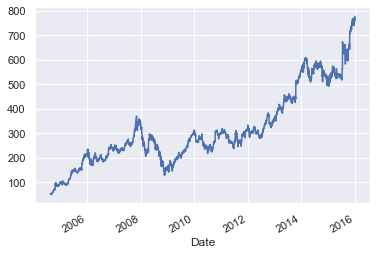

In [28]:
ya.plot()

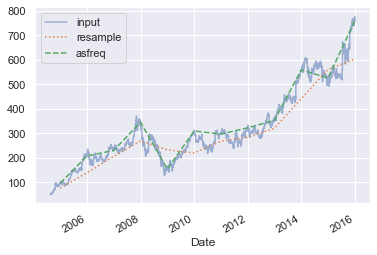

In [29]:
#리샘플링 및 주기 변경
#시계열 데이터에서 일반적으로 필요한 작업은 더 높거나 낮은 주기로 표본을 다시 추출하는 것이다
#resample()메서드(데이터를 집계)를 사용하거나 훨씬 더 간단한 asfreq() 메서드(데이터를 선택) 사용
#영업일 기준 연말 데이터를 리샘플링(down-sampling)
#차이점은 각 점에서 resample은 전년도 평균을 보여주지만, asfreq는 연말 주가를 보여준다는 것이다
ya.plot(alpha=0.5,style='-')
ya.resample('BA').mean().plot(style=':')
ya.asfreq('BA').plot(style='--');
plt.legend(['input','resample','asfreq'],
          loc='upper left');

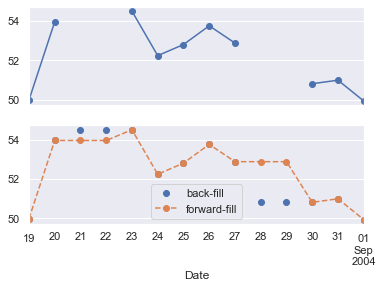

In [30]:
#up-sampling의 경우 resample()은 asfreq()가 대체로 유사하지만 , resample 메서드에서 더 많은 옵션 사용 가능
#두 메서드의 기본 값은 업샘플링된 점을 빈 값으로 둔다(NA 값으로 채운다)
#영업일 데이터를 일별 주기로(주말 포함) 리샘플링
#영업일이 아닌 날은 NA값으로 두기 때문에 그래프 상에 표시되지 않는다
fig, ax =plt.subplots(2, sharex=True)
data=ya.iloc[:10]

data.asfreq('D').plot(ax=ax[0],marker='o')

data.asfreq('D',method='bfill').plot(ax=ax[1],style='o')
data.asfreq('D',method='ffill').plot(ax=ax[1],style='--o')
ax[1].legend(['back-fill','forward-fill']);

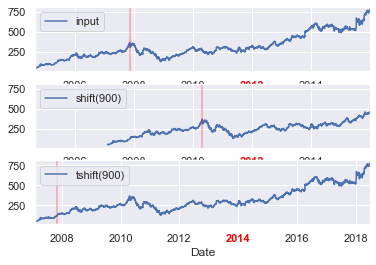

In [31]:
#시간 이동(Time-shift)
#시간에 따라 데이터를 이동시키는 것이다
#데이터를 이동시키는 shift() 와 인덱스를 이동시키는 tshift(), 두 경우 모두 이동은 주기의 배수로 지정
#shift(900)은 데이터를 900일 이동시켜 그래프 끝의 일부를 밀어내고 그 반대쪽은 NA값으로 두는 반면 ,tshift(900)은 인덱스 값을 900일 만큼 이동
fig, ax=plt.subplots(3,sharey=True)
#데이터에 주기를 적용
ya=ya.asfreq('D',method='pad')

ya.plot(ax=ax[0])
ya.shift(900).plot(ax=ax[1])
ya.tshift(900).plot(ax=ax[2])

#범례와 주석
local_max=pd.to_datetime('2007-11-05')
offset=pd.Timedelta(900,'D')

ax[0].legend(['input'],loc=2)
ax[0].get_xticklabels()[4].set(weight='heavy',color='red')
ax[0].axvline(local_max,alpha=0.3,color='red')

ax[1].legend(['shift(900)'],loc=2)
ax[1].get_xticklabels()[4].set(weight='heavy',color='red')
ax[1].axvline(local_max+offset,alpha=0.3,color='red')

ax[2].legend(['tshift(900)'],loc=2)
ax[2].get_xticklabels()[4].set(weight='heavy',color='red')
ax[2].axvline(local_max,alpha=0.3,color='red')

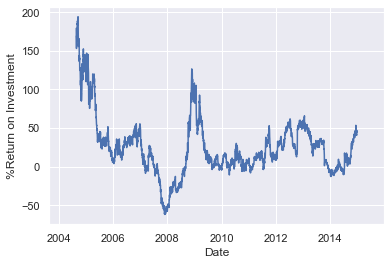

In [32]:
#이동된 값을 사용해 데이터세트의 기간 동안 야후 주가의 연간 투자 대비 효과를 계산
#그래프는 야후 주식의 전반적 추세를 보여준다
ROI=100*(ya.tshift(-365)/ya-1)
ROI.plot()
plt.ylabel('%Return on Investment');

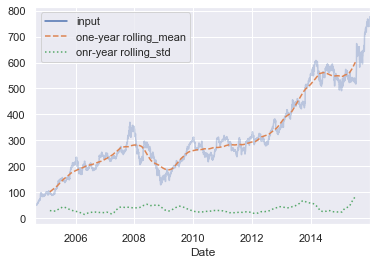

In [33]:
#롤링 윈도우(rolling windows)
#Series와 DataFrame 객체의 rolling()속성을 통해 수행 가능, groupby()에서 본 것과 유사한 뷰룰 반환
#예를 들어, 야후 주가의 1년 중심 롤링 평균과 표준 편차를 구함
rolling=ya.rolling(365,center=True)

data=pd.DataFrame({'input':ya,
                  'one-year rolling_mean':rolling.mean(),
                  'onr-year rolling_std':rolling.std()})
ax=data.plot(style=['-','--',':'])
ax.lines[0].set_alpha(0.3)

# 예제: 시애틀 자전거 수 시각화

In [34]:
data=pd.read_csv('FremontBridge.csv',index_col='Date',parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


In [35]:
data.columns=['Total','West','East']

In [36]:
data.dropna().describe()

,Total,West,East
count,133385.000000,133385.000000,133385.000000
mean,113.127503,51.644285,61.483218
std,144.370088,66.604699,89.947209
min,0.000000,0.000000,0.000000
25%,14.000000,6.000000,7.000000
50%,61.000000,28.000000,30.000000
75%,147.000000,69.000000,74.000000
max,1097.000000,698.000000,850.000000


In [37]:
#데이터 시각화하기
%matplotlib inline
import seaborn; seaborn.set()

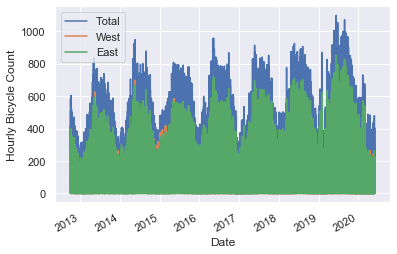

In [38]:
data.plot()
plt.ylabel('Hourly Bicycle Count');

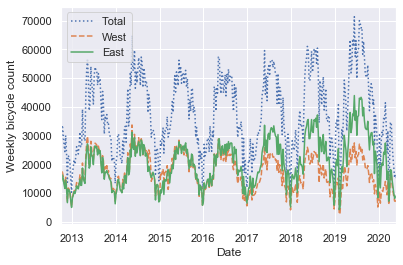

In [39]:
#좀 더 성긴 그리드에 데이터를 리샘플링하면 더 많은 통찰력을 얻을 수 있다
#주 단위로 리샘플링
weekly=data.resample('W').sum()
weekly.plot(style=[':','--','-'])
plt.ylabel('Weekly bicycle count');

Text(0, 0.5, 'mean hourly count')

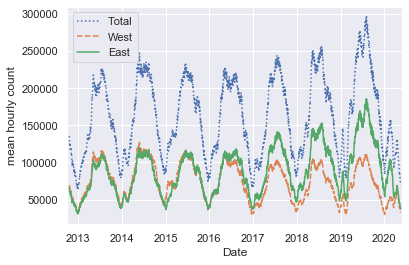

In [40]:
#롤링 평균을 구해 해당 기간의 데이터가 중심에 오게 한다
daily=data.resample('D').sum()
daily.rolling(30,center=True).sum().plot(style=[':','--','-'])
plt.ylabel('mean hourly count')

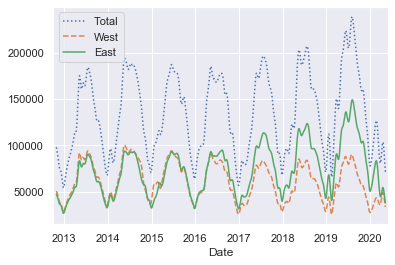

In [41]:
#가우스 윈도우 같은 윈도우 함수를 사용해 롤링 평균을 부드럽게 표현
daily.rolling(50,center=True,
             win_type='gaussian').sum(std=10).plot(style=[':','--','-'])

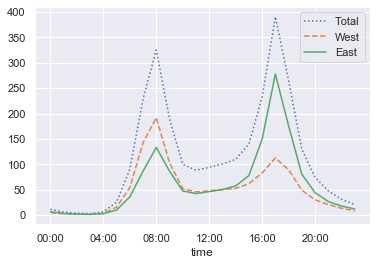

In [42]:
#데이터 파해쳐 보기
#예를 들어 하루의 시간대를 기준으로 한 함수로 평균 통행량 구하기
by_time=data.groupby(data.index.time).mean()
hourly_ticks=4*60*60*np.arange(6)
by_time.plot(xticks=hourly_ticks,style=[':','--','-'])

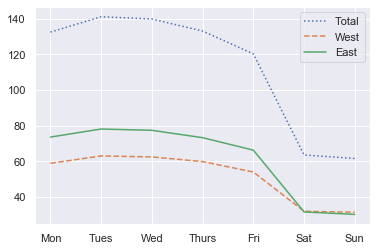

In [43]:
#요일에 따라 통행량이 어떻게 변하는지 구하기
by_weekday=data.groupby(data.index.dayofweek).mean()
by_weekday.index=['Mon','Tues','Wed','Thurs','Fri','Sat','Sun']
by_weekday.plot(style=[':','--','-'])